In [32]:
cd C:\\Users\\sanke\\datasets\\sms

C:\Users\sanke\datasets\sms


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

In [34]:
df = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df['length'] = df['message'].apply(len)

In [36]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
df.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [38]:
df.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

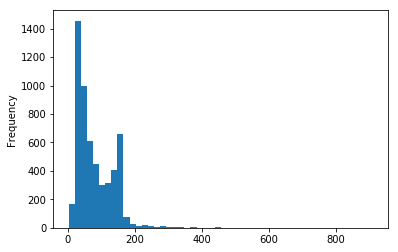

In [39]:
df['length'].plot.hist(bins=50)

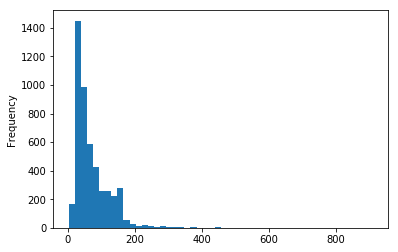

In [40]:
df[df['label']=='ham']['length'].plot.hist(bins=50)

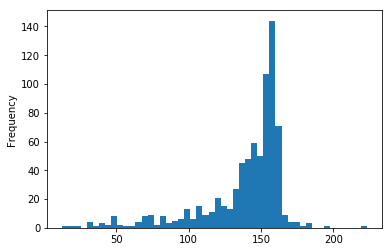

In [41]:
df[df['label']=='spam']['length'].plot.hist(bins=50)

In [42]:
import string
from nltk.corpus import stopwords
def text_process(sms):
    s = [c for c in sms if c not in string.punctuation]
    s= ''.join(s)
    return [w for w in s if w not in stopwords.words('english')]

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transform = CountVectorizer(analyzer=text_process).fit(df['message'])

In [44]:
mess_bow = bow_transform.transform(df['message'])

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer 
tfidf = TfidfTransformer().fit(mess_bow)
mess_tfidf = tfidf.transform(mess_bow)

In [46]:
from sklearn.model_selection import train_test_split
mess_train,mess_test,label_train,label_test = train_test_split(df['message'],df['label'],test_size=0.3)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipe = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                 ('tfidf',TfidfTransformer()),
                 ('classifier',MultinomialNB())])

In [48]:
pipe.fit(mess_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000020A3D82E730>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [49]:
prd = pipe.predict(mess_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(label_test,prd))
print(confusion_matrix(label_test,prd))

             precision    recall  f1-score   support

        ham       0.97      0.99      0.98      1450
       spam       0.92      0.83      0.87       222

avg / total       0.97      0.97      0.97      1672

[[1434   16]
 [  38  184]]
